In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [24]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [26]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [27]:
dataset=pd.DataFrame(df)

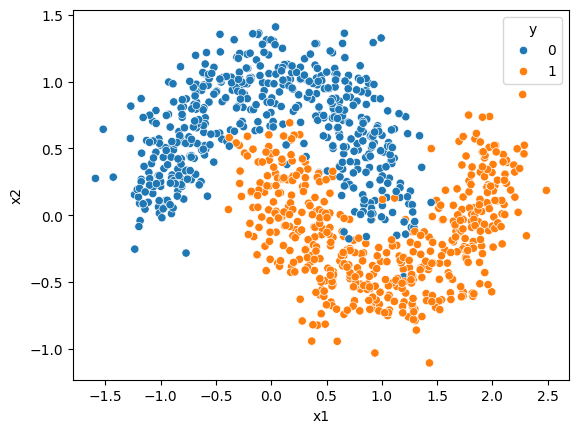

In [28]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [29]:
x_a=dataset.iloc[:,:-1]
y_a=dataset["y"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test =train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [38]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(dt.score(x_test,y_test)*100, dt.score(x_train,y_train)*100)

97.5 100.0


In [39]:
sv=SVC()
sv.fit(x_train,y_train)
print(sv.score(x_test,y_test)*100, sv.score(x_train,y_train)*100)

98.0 96.125


In [40]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print(nb.score(x_test,y_test)*100, nb.score(x_train,y_train)*100)

84.5 87.25


In [41]:
from sklearn.ensemble import VotingClassifier

In [49]:
li=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("nb",GaussianNB())]

In [50]:
vc=VotingClassifier(li)
vc.fit(x_train,y_train)



,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [53]:
print(vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100)

97.25 98.0


In [56]:
prd = {
    "dt": dt.predict(x_test),
    "svm": sv.predict(x_test),
    "nb": nb.predict(x_test),
    "vc":vc.predict(x_test)
}


In [57]:
pd.DataFrame(prd)

,dt,svm,nb,vc
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
195,1,1,1,1
196,0,0,0,0
197,0,0,0,0
198,0,0,0,0
